CREATE TABLE purprod_b
as select 제휴사,구매일자,대분류코드,sum(구매금액) as "구매금액" from purprod
group by 제휴사,구매일자,대분류코드 ; 

CREATE TABLE purprod_b_1
AS select * from purprod_b
where 제휴사 = 'B'
ORDER BY 대분류코드,구매일자;

SELECT * FROM purprod_b_1;
COMMIT;

In [1]:
import cx_Oracle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rcParams["font.family"] = "Malgun Gothic"

In [2]:
# 전체 데이터 분류
db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from purprod_b_1")
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='purprod_b_1'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
df.columns = ["제휴사","구매일자","대분류코드","구매금액"]
df.head()

,제휴사,구매일자,대분류코드,구매금액
0,B,20140929,1,1488162
1,B,20140930,1,1089580
2,B,20141001,1,897590
3,B,20141002,1,1150808
4,B,20141003,1,1236157


In [7]:
df1 = pd.read_csv("제휴사b분류.csv")
df1 = df1.iloc[:,1:]
df2 = df1[["대분류코드","대분류카테고리"]]
df2["대분류코드"]= df2["대분류코드"].astype(int)
df2= df2.drop_duplicates()
df2.head()

C:\Users\h\AppData\Local\Temp\ipykernel_20776\3960859155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["대분류코드"]= df2["대분류코드"].astype(int)


,대분류코드,대분류카테고리
0,1,과일/채소/곡물
3,2,간편식
5,3,유제품/냉장/냉동
7,4,과일/채소/곡물
11,5,과일/채소/곡물


In [8]:
df3 = pd.merge(df,df2)

In [9]:
from datetime import datetime
def solution(x):
    x = datetime.strptime(str(x),"%Y%m%d")
    return datetime.strftime(x,"%Y-%m")

df3["구매일자"]= df3["구매일자"].apply(solution)

In [10]:
df3["대분류카테고리"].value_counts()

기타           17352
가공식품          6885
수산/정육         6803
유제품/냉장/냉동     6685
과일/채소/곡물      6348
생활잡화/뷰티       3807
주방/청소/세제      2629
유아/위생/미용      1450
간편식            720
Name: 대분류카테고리, dtype: int64

In [11]:
list1 =  df3["대분류카테고리"].value_counts().index.tolist()
list2 = []
for i in list1:
    list2.append(df3[df3["대분류카테고리"]==f"{i}"].groupby("구매일자")["구매금액"].sum())

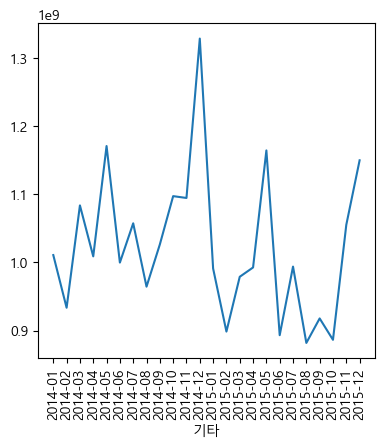

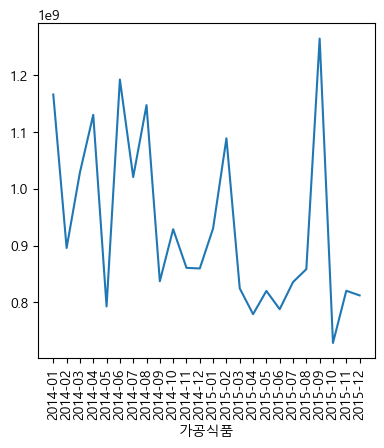

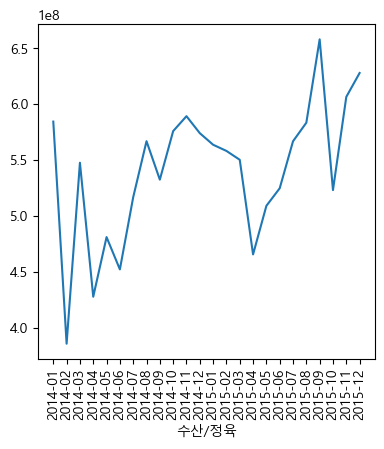

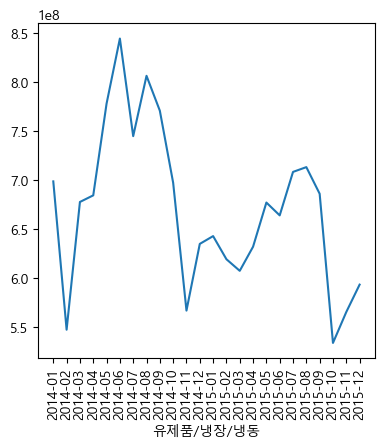

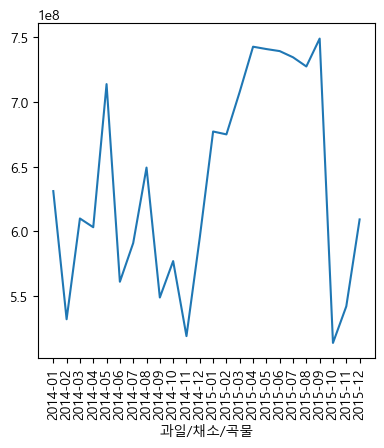

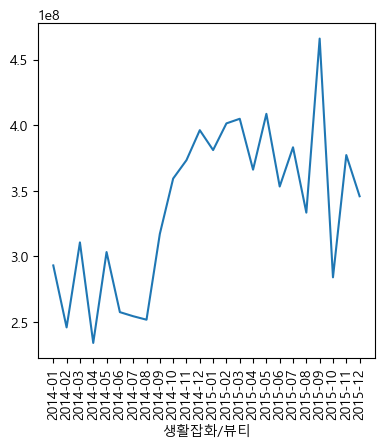

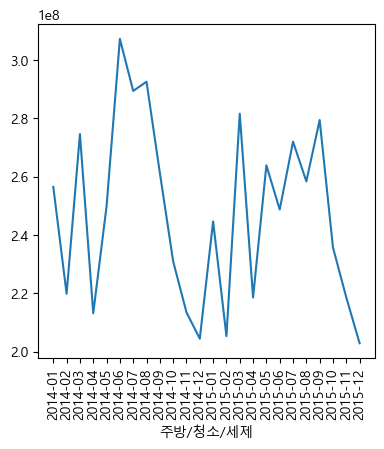

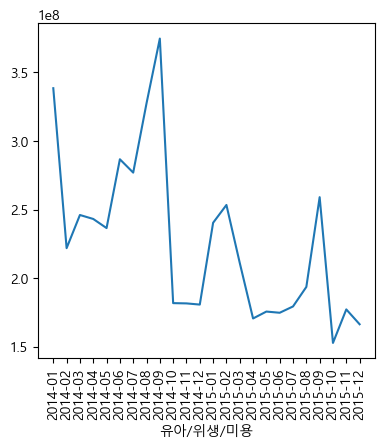

In [13]:
# 과일/채소/곡물 
import matplotlib.pyplot as plt
def solution(x):
    fig = plt.figure(figsize=(20,20))
    ex = f'ex{x+1}'
    ex = fig.add_subplot(4,4,x+1)
    ex.plot(list2[x].index,list2[x])
    ex.set_xticks(list2[x].index,list2[x].index,rotation='vertical')
    ex.set_xlabel(list1[x])
for i in range(8):
    print()
    solution(i)

# 제휴사 D

In [8]:
# 전체 데이터 분류
db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from purprod_d_1")
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='purprod_d_1'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
df.columns = ["제휴사","구매일자","대분류코드","구매금액"]
df.head()

,제휴사,구매일자,대분류코드,구매금액
0,D,20140101,1,51000
1,D,20140102,1,27810
2,D,20140103,1,358600
3,D,20140104,1,40400
4,D,20140105,1,10400


In [9]:
df1_d = pd.read_csv("대분류코드D.csv")
df1_d = df1_d.iloc[:,1:]
df2_d = df1_d[["대분류코드","대분류카테고리"]]
df2_d["대분류코드"]= df2_d["대분류코드"].astype(int)
df2_d= df2_d.drop_duplicates()
df2_d.head()

# 1 중분류명: 베이직케어(스킨,토너, 미스트, 로션, 에센스 크림 등)/ 선케어/ 클렌징/집중케어(팩)/ 남성케어/ 베이비케어
# 2 헤어, 바디케어, 핸드/풋케어, 구강케어, 여성용품
# 3 피트니스, 건강기능식품, 일반의약외품
# 4 과자, 음료
# 5 화장지/티슈, 기기, 방향/제습/탈취제/
# 6 양말, 미용소품, 계절팩, 여행용품, 안정용품, 전기용품, 파티/팬시용품, 우산.양산류
# 7 향수
# 8 립, 네일, 아이, 베이스 메이크업

C:\Users\h\AppData\Local\Temp\ipykernel_11328\2149364101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_d["대분류코드"]= df2_d["대분류코드"].astype(int)


,대분류코드,대분류카테고리
0,1,생활잡화 /뷰티
22,2,생활잡화 /뷰티
51,3,생활잡화 /뷰티
67,4,생활잡화 /뷰티
102,5,생활잡화 /뷰티


In [12]:
df3_d = pd.merge(df,df2_d)

In [13]:
from datetime import datetime
def solution(x):
    x = datetime.strptime(str(x),"%Y%m%d")
    return datetime.strftime(x,"%Y-%m")

df3_d["구매일자"]= df3_d["구매일자"].apply(solution)

In [27]:
df3_d["대분류카테고리"].value_counts()

생활잡화 /뷰티    5397
Name: 대분류카테고리, dtype: int64

In [14]:
df3_d

,제휴사,구매일자,대분류코드,구매금액,대분류카테고리
0,D,2014-01,1,51000,생활잡화 /뷰티
1,D,2014-01,1,27810,생활잡화 /뷰티
2,D,2014-01,1,358600,생활잡화 /뷰티
3,D,2014-01,1,40400,생활잡화 /뷰티
4,D,2014-01,1,10400,생활잡화 /뷰티
...,...,...,...,...,...
5392,D,2015-12,8,190800,생활잡화 /뷰티
5393,D,2015-12,8,323100,생활잡화 /뷰티
5394,D,2015-12,8,403000,생활잡화 /뷰티
5395,D,2015-12,8,252500,생활잡화 /뷰티


In [36]:
df3_d.isnull().sum()

제휴사        0
구매일자       0
대분류코드      0
구매금액       0
대분류카테고리    0
dtype: int64

In [16]:
list1_d =  df3_d["대분류카테고리"].value_counts().index.tolist()
list2_d = []
for i in list1_d:
    list2_d.append(df3_d[df3_d["대분류카테고리"]==f"{i}"].groupby("구매일자")["구매금액"].sum())

In [34]:
list2_d

[구매일자
 2014-01    12624800
 2014-02    15310480
 2014-03    18096760
 2014-04    20006100
 2014-05    21049120
 2014-06    21951750
 2014-07    26474140
 2014-08    27383850
 2014-09    29010569
 2014-10    32319840
 2014-11    41055830
 2014-12    46918865
 2015-01    40967690
 2015-02    47871770
 2015-03    46297870
 2015-04    44533210
 2015-05    47508030
 2015-06    48485370
 2015-07    45279100
 2015-08    46882120
 2015-09    54134590
 2015-10    47680630
 2015-11    47320470
 2015-12    66192590
 Name: 구매금액, dtype: int64]

IndexError: list index out of range

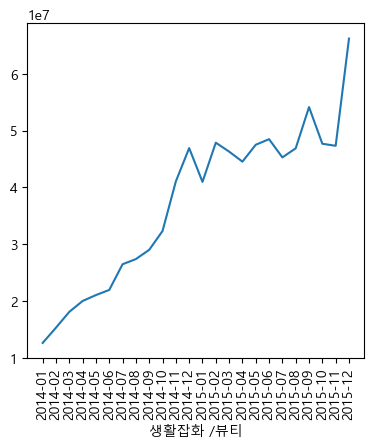

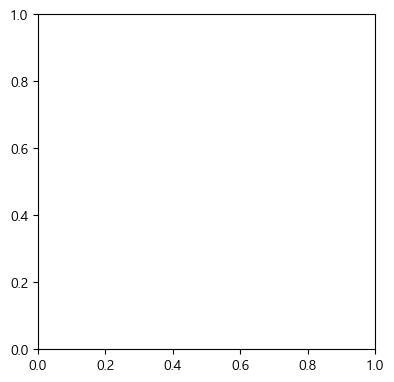

In [17]:
# D제휴사 생활잡화/뷰티
import matplotlib.pyplot as plt
def solution(x):
    fig = plt.figure(figsize=(20,20))
    ex = f'ex{x+1}'
    ex = fig.add_subplot(4,4,x+1)
    ex.plot(list2_d[x].index,list2_d[x])
    ex.set_xticks(list2_d[x].index,list2_d[x].index,rotation='vertical')
    ex.set_xlabel(list1_d[x])
for i in range(8):
    print()
    solution(i)
    

In [18]:
df3_1 = df3_d[df3_d['대분류코드'] == 1]
df3_2 = df3_d[df3_d['대분류코드'] == 2]
df3_3 = df3_d[df3_d['대분류코드'] == 3]
df3_4 = df3_d[df3_d['대분류코드'] == 4]
df3_5 = df3_d[df3_d['대분류코드'] == 5]
df3_6 = df3_d[df3_d['대분류코드'] == 6]
df3_7 = df3_d[df3_d['대분류코드'] == 7]
df3_8 = df3_d[df3_d['대분류코드'] == 8]

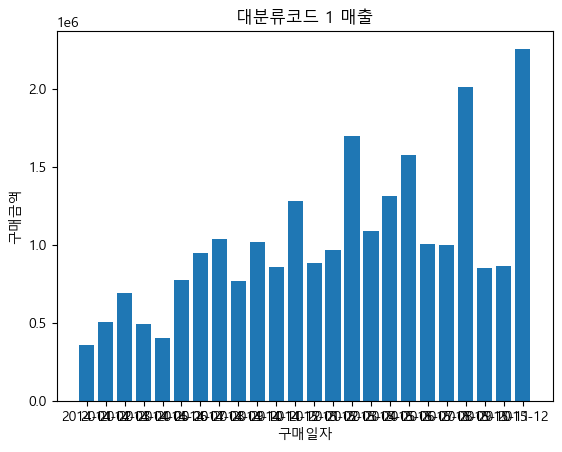

In [19]:
import matplotlib.pyplot as plt

# 대분류코드 1
plt.bar(df3_1['구매일자'], df3_1['구매금액'])
plt.xlabel('구매일자')
plt.ylabel('구매금액')
plt.title('대분류코드 1 매출')
plt.show()

Text(0.5, 1.0, '대분류코드 8 매출')

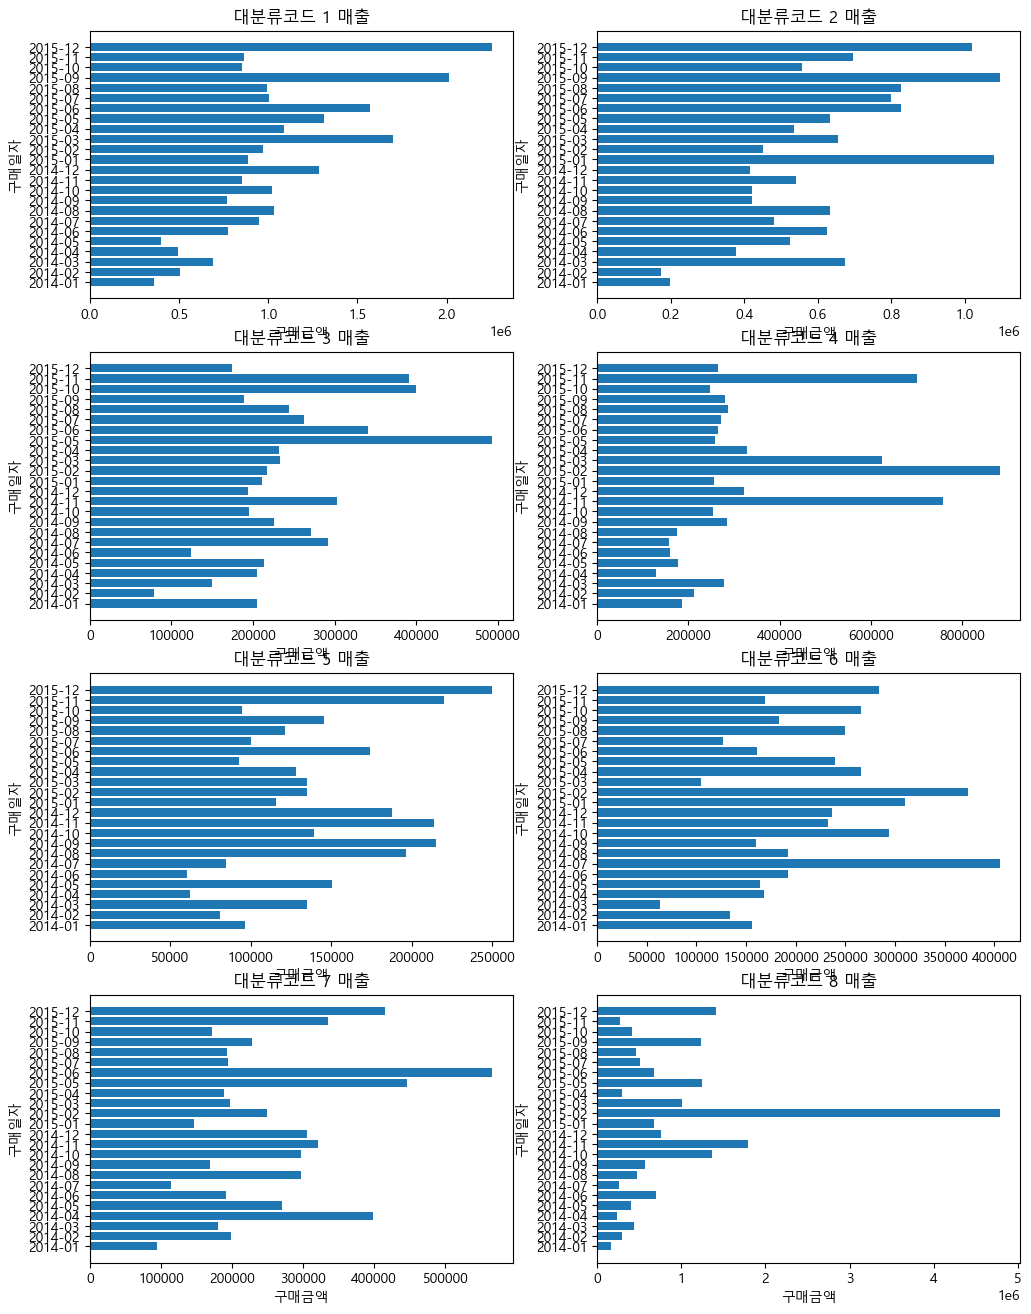

In [20]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# 대분류코드 1
axs[0, 0].barh(df3_1['구매일자'], df3_1['구매금액'])
axs[0, 0].set_xlabel('구매금액')
axs[0, 0].set_ylabel('구매일자')
axs[0, 0].set_title('대분류코드 1 매출')

# 대분류코드 2
axs[0, 1].barh(df3_2['구매일자'], df3_2['구매금액'])
axs[0, 1].set_xlabel('구매금액')
axs[0, 1].set_ylabel('구매일자')
axs[0, 1].set_title('대분류코드 2 매출')

# 대분류코드 3
axs[1, 0].barh(df3_3['구매일자'], df3_3['구매금액'])
axs[1, 0].set_xlabel('구매금액')
axs[1, 0].set_ylabel('구매일자')
axs[1, 0].set_title('대분류코드 3 매출')

# 대분류코드 4
axs[1, 1].barh(df3_4['구매일자'], df3_4['구매금액'])
axs[1, 1].set_xlabel('구매금액')
axs[1, 1].set_ylabel('구매일자')
axs[1, 1].set_title('대분류코드 4 매출')

# 대분류코드 5
axs[2, 0].barh(df3_5['구매일자'], df3_5['구매금액'])
axs[2, 0].set_xlabel('구매금액')
axs[2, 0].set_ylabel('구매일자')
axs[2, 0].set_title('대분류코드 5 매출')

# 대분류코드 6
axs[2, 1].barh(df3_6['구매일자'], df3_6['구매금액'])
axs[2, 1].set_xlabel('구매금액')
axs[2, 1].set_ylabel('구매일자')
axs[2, 1].set_title('대분류코드 6 매출')

# 대분류코드 7
axs[3, 0].barh(df3_7['구매일자'], df3_7['구매금액'])
axs[3, 0].set_xlabel('구매금액')
axs[3, 0].set_ylabel('구매일자')
axs[3, 0].set_title('대분류코드 7 매출')

# 대분류코드 8
axs[3, 1].barh(df3_8['구매일자'], df3_8['구매금액'])
axs[3, 1].set_xlabel('구매금액')
axs[3, 1].set_ylabel('구매일자')
axs[3, 1].set_title('대분류코드 8 매출')


# 급증

# 1 베이직케어(스킨,토너, 미스트, 로션, 에센스 크림 등)/ 선케어/ 클렌징/집중케어(팩)/ 남성케어/ 베이비케어
# 2 헤어, 바디케어, 핸드/풋케어, 구강케어, 여성용품
# 3 피트니스, 건강기능식품, 일반의약외품
# 4 과자, 음료
# 5 화장지/티슈, 기기, 방향/제습/탈취제/
# 6 양말, 미용소품, 계절팩, 여행용품, 안정용품, 전기용품, 파티/팬시용품, 우산.양산류
# 7 향수
# 8 립, 네일, 아이, 베이스 메이크업

In [62]:
## 남자 성별에 따른 분류

db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from man_a")
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='man_a'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
df.columns = ["성별","구매일자","대분류코드","구매금액"]
df.head()

,성별,구매일자,대분류코드,구매금액
0,M,20140101,1,376500
1,M,20140101,2,119000
2,M,20140101,3,457700
3,M,20140101,4,3322400
4,M,20140101,5,1130010


In [58]:
from datetime import datetime
def solution(x):
    x = datetime.strptime(str(x),"%Y%m%d")
    return datetime.strftime(x,"%Y%m")

df["구매일자"]= df["구매일자"].apply(solution)

In [59]:
df.head(40)
df_s = df.groupby(['성별','구매일자','대분류코드']).agg({'구매금액':'sum'}).reset_index()    # reset_index 이걸로 데이터프레임처럼 하기

In [60]:
df_s

,성별,구매일자,대분류코드,구매금액
0,M,201401,1,922135850
1,M,201401,2,465376960
2,M,201401,3,152641000
3,M,201401,4,981165000
4,M,201401,5,294117690
...,...,...,...,...
211,M,201512,5,322528750
212,M,201512,6,524867690
213,M,201512,7,376062160
214,M,201512,8,625699910


In [61]:
df_s.to_csv('C:\hmkd1\m4_db/남자_제휴사A.csv', index=False)

In [72]:
# 제휴사 B
db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from man_b")
x = cursor.fetchall()
df_b = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='man_b'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
df_b.columns = ["성별","구매일자","대분류코드","구매금액"]
df_b.head()

,성별,구매일자,대분류코드,구매금액
0,M,20140101,4,688600
1,M,20140101,5,702240
2,M,20140101,6,430161
3,M,20140101,7,412490
4,M,20140101,8,584560


In [73]:
from datetime import datetime
def solution(x):
    x = datetime.strptime(str(x),"%Y%m%d")
    return datetime.strftime(x,"%Y%m")

df_b["구매일자"]= df_b["구매일자"].apply(solution)

In [74]:
df_bs = df_b.groupby(['성별','구매일자','대분류코드']).agg({'구매금액':'sum'}).reset_index()    # reset_index 이걸로 데이터프레임처럼 하기

In [75]:
df_bs.to_csv('C:\hmkd1\m4_db/남자_제휴사B.csv', index=False)

In [69]:
# 제휴사 C
db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from man_c")
x = cursor.fetchall()
df_c = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='man_c'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
df_c.columns = ["성별","구매일자","대분류코드","구매금액"]
df_c.head()

,성별,구매일자,대분류코드,구매금액
0,M,20140101,1,985268
1,M,20140101,2,381300
2,M,20140101,3,662518
3,M,20140101,4,483219
4,M,20140101,5,898471


In [65]:
from datetime import datetime
def solution(x):
    x = datetime.strptime(str(x),"%Y%m%d")
    return datetime.strftime(x,"%Y%m")

df_c["구매일자"]= df_c["구매일자"].apply(solution)

In [70]:
df_cs = df_c.groupby(['성별','구매일자','대분류코드']).agg({'구매금액':'sum'}).reset_index()    # reset_index 이걸로 데이터프레임처럼 하기

In [71]:
df_cs.to_csv('C:\hmkd1\m4_db/남자_제휴사C.csv', index=False)

In [77]:
# 제휴사 D
db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from man_d")
x = cursor.fetchall()
df_d = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='man_d'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
df_d.columns = ["성별","구매일자","대분류코드","구매금액"]
df_d.head()

,성별,구매일자,대분류코드,구매금액
0,M,20140101,2,31000
1,M,20140101,4,30940
2,M,20140101,5,9400
3,M,20140102,3,22800
4,M,20140102,4,14380


In [78]:
from datetime import datetime
def solution(x):
    x = datetime.strptime(str(x),"%Y%m%d")
    return datetime.strftime(x,"%Y%m")

df_d["구매일자"]= df_d["구매일자"].apply(solution)

In [79]:
df_ds = df_d.groupby(['성별','구매일자','대분류코드']).agg({'구매금액':'sum'}).reset_index()    # reset_index 이걸로 데이터프레임처럼 하기

In [80]:
df_ds.to_csv('C:\hmkd1\m4_db/남자_제휴사D.csv', index=False)